<a href="https://colab.research.google.com/github/karimahagstn/latihan_1/blob/main/visualisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

file_path = 'schedule_lab.xlsx'

# Menampilkan daftar nama sheet
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)


['Worksheet']


In [2]:
df = xls.parse(xls.sheet_names[0])

# Menampilkan 5 baris pertama
print(df.head())


   No                        Time Start                       Time Finish  \
0   1    Tuesday, 21 January 2025 20:16    Tuesday, 21 January 2025 21:16   
1   2  Wednesday, 22 January 2025 07:50  Wednesday, 22 January 2025 17:50   
2   3   Saturday, 25 January 2025 08:08     Sunday, 26 January 2025 17:08   
3   4  Saturday, 01 February 2025 07:37    Sunday, 02 February 2025 17:37   
4   5    Monday, 10 February 2025 10:00    Monday, 10 February 2025 12:45   

                      User                          Course  \
0   Zaenal Alamsyah, M.Kom  Interaksi Manusia dan Komputer   
1         Farel Alexander                     UI/UX Design   
2         Farel Alexander                       Penelitian   
3         Farel Alexander                Desain Periklanan   
4  M. Ikhsan Thohir, M.Kom       Algoritma dan Pemrograman   

                      Major  Group                        Laboratory  \
0        Teknik Informatika  TI23T  Computer Laboratory 2 (Software)   
1  Desain Komunikasi

<ipython-input-11-84b219ab3cac>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lab_counts.values, y=lab_counts.index, palette="viridis")


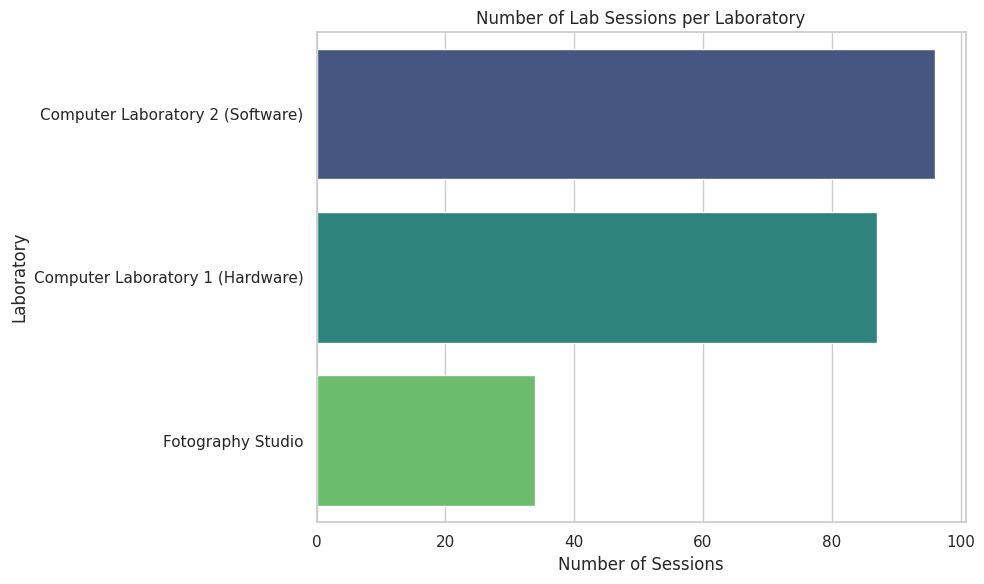

<ipython-input-11-84b219ab3cac>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hours_by_user.values, y=hours_by_user.index, palette="coolwarm")


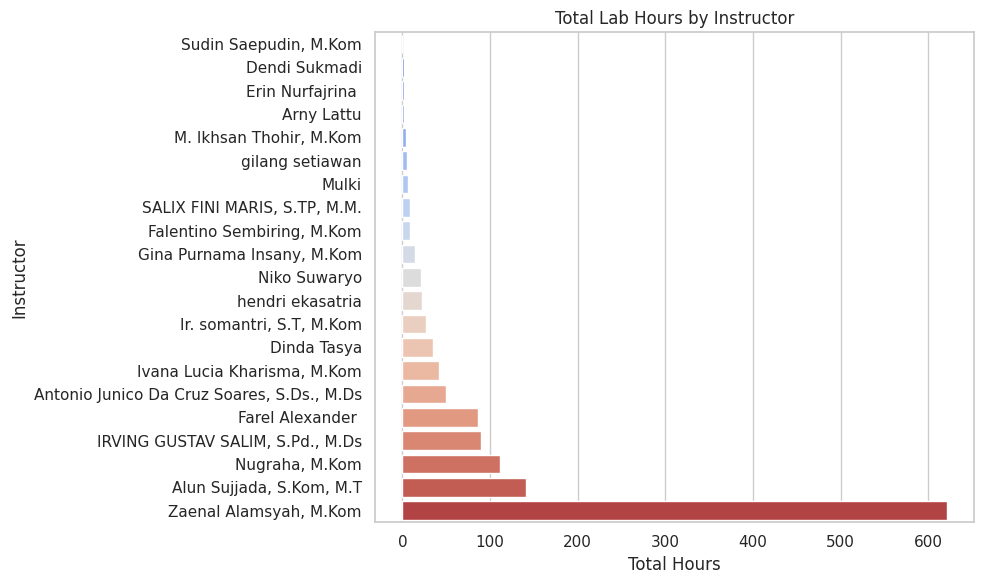

<ipython-input-11-84b219ab3cac>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=course_counts.values, y=course_counts.index, palette="cubehelix")


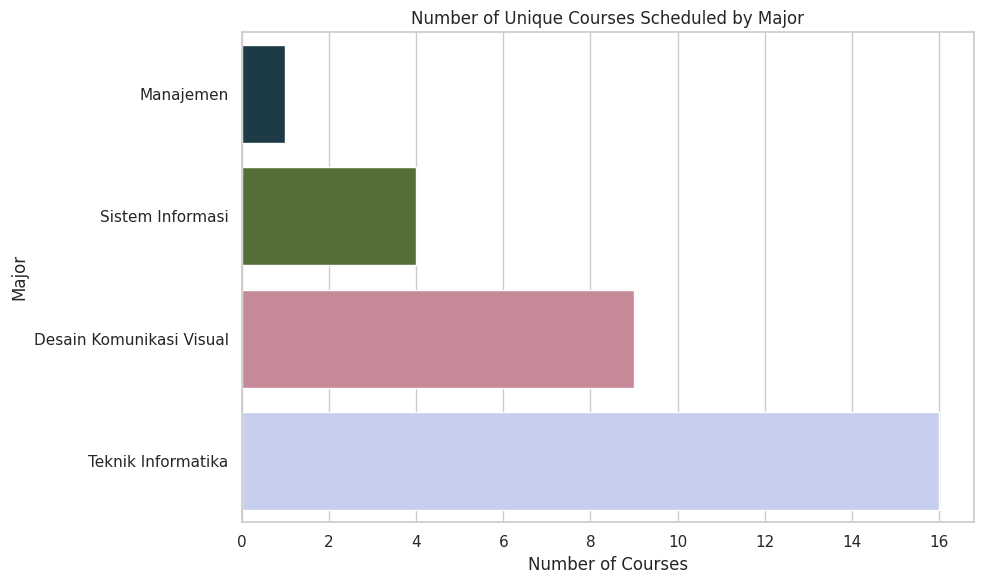

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Preprocess time columns
df['Time Start'] = pd.to_datetime(df['Time Start'])
df['Time Finish'] = pd.to_datetime(df['Time Finish'])

# Calculate duration in hours
df['Duration Hours'] = (df['Time Finish'] - df['Time Start']).dt.total_seconds() / 3600

# Set Seaborn style
sns.set(style="whitegrid")

# --- Plot 1: Number of Lab Sessions per Laboratory ---
plt.figure(figsize=(10, 6))
lab_counts = df['Laboratory'].value_counts()
sns.barplot(x=lab_counts.values, y=lab_counts.index, palette="viridis")
plt.title("Number of Lab Sessions per Laboratory")
plt.xlabel("Number of Sessions")
plt.ylabel("Laboratory")
plt.tight_layout()
plt.show()

# --- Plot 2: Total Lab Hours by Instructor ---
plt.figure(figsize=(10, 6))
hours_by_user = df.groupby("User")["Duration Hours"].sum().sort_values()
sns.barplot(x=hours_by_user.values, y=hours_by_user.index, palette="coolwarm")
plt.title("Total Lab Hours by Instructor")
plt.xlabel("Total Hours")
plt.ylabel("Instructor")
plt.tight_layout()
plt.show()

# --- Plot 3: Number of Courses Scheduled by Major ---
plt.figure(figsize=(10, 6))
course_counts = df.groupby("Major")["Course"].nunique().sort_values()
sns.barplot(x=course_counts.values, y=course_counts.index, palette="cubehelix")
plt.title("Number of Unique Courses Scheduled by Major")
plt.xlabel("Number of Courses")
plt.ylabel("Major")
plt.tight_layout()
plt.show()
